# The Deep Learning Homework 3 - Question No. 03  
Bahar Mahdavi - SN: 40152521337

# Defining 2 following models network and evaluate

Model1 : Conv1D(C_in = 2, C_out = 1, kernel = 2, padding = 0, stride = 1)  Average_Pooling(kernel = 2, padding = 0, stride = 1)

Model2 : Conv1D(C_in = 2, C_out = 1, kernel = 2, padding = 0, stride = 1)  Max_Pooling(kernel = 2, padding = 0, stride = 1)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [ ]:
# Define Data1 and Data2
Data1 = torch.tensor([[[1, 2, -3, 2], [1, 2, -2, 1]]], dtype=torch.float32)
Data2 = torch.tensor([[[4, 2, -2, 2], [3, 2, -7, 2]]], dtype=torch.float32)

In [ ]:
print(Data1)
print(Data1.shape)
print(type(Data1))

tensor([[[ 1.,  2., -3.,  2.],
         [ 1.,  2., -2.,  1.]]])
torch.Size([1, 2, 4])
<class 'torch.Tensor'>


In [ ]:
print(Data2)
print(Data2.shape)
print(type(Data2))

tensor([[[ 4.,  2., -2.,  2.],
         [ 3.,  2., -7.,  2.]]])
torch.Size([1, 2, 4])
<class 'torch.Tensor'>


In [ ]:
# Define Network models
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=2, padding=0 , stride=1, bias=False)
        self.avg_pool = nn.AvgPool1d(kernel_size=2, padding=0, stride=1)

    def forward(self, x):
        x = self.conv(x)
        x = self.avg_pool(x)
        return x

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.conv = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=2, padding=0 , stride=1, bias=False)
        self.max_pool = nn.MaxPool1d(kernel_size=2, padding=0, stride=1)

    def forward(self, x):
        x = self.conv(x)
        x = self.max_pool(x)
        return x

In [ ]:
model1 = Model1()
model2 = Model2()

out1 = model1(Data1)
out2 = model2(Data2)

distance = torch.norm(out2 - out1, p=2) #l1-Norm

print("Output 1:", out1)
print("Output 2:", out2)
print("Difference:", distance)

Output 1: tensor([[[ 1.1526, -0.1295]]], grad_fn=<SqueezeBackward1>)
Output 2: tensor([[[3.8646, 3.8646]]], grad_fn=<SqueezeBackward1>)
Difference: tensor(4.8278, grad_fn=<LinalgVectorNormBackward0>)


# Model 1

In [ ]:
summary(model1, (2,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                 [-1, 1, 3]               4
         AvgPool1d-2                 [-1, 1, 2]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
optimizer1 = optim.SGD(model1.parameters(), lr=1e-4)
criterion1 = nn.MSELoss()

In [ ]:
n_epoch = 10000


loss_list1 = []

for epoch in range(n_epoch):

    optimizer1.zero_grad()
    out2 = model1(Data2)
    out1 = model1(Data1)
    loss = criterion1(out2,out1)
    if epoch%1000 ==0 or epoch== n_epoch-1:
       print(f'epoch {epoch} loss : {loss}')
    loss_list1.append(loss.item())
    loss.backward()
    optimizer1.step()

epoch 0 loss : 1.1371827125549316
epoch 1000 loss : 0.07905081659555435
epoch 2000 loss : 0.00683636125177145
epoch 3000 loss : 0.000910209899302572
epoch 4000 loss : 0.0001821737823775038
epoch 5000 loss : 4.403735147207044e-05
epoch 6000 loss : 1.1272597475908697e-05
epoch 7000 loss : 2.9290504244272597e-06
epoch 8000 loss : 7.643365051990259e-07
epoch 9000 loss : 1.9954886454343068e-07
epoch 9999 loss : 5.276150361055443e-08


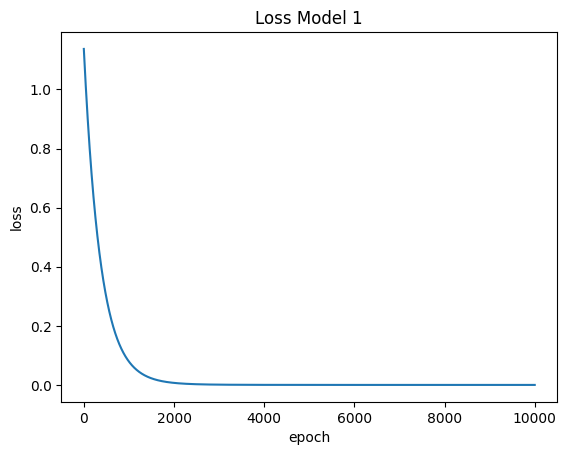

In [ ]:
plt.plot(range(0,n_epoch), loss_list1)
plt.title('Loss Model 1')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Model 2:

In [ ]:
summary(model2, (2,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                 [-1, 1, 3]               4
         MaxPool1d-2                 [-1, 1, 2]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
optimizer2 = optim.SGD(model2.parameters(), lr=1e-4)
criterion2 = nn.MSELoss()

In [ ]:
n_epoch = 10000


loss_list2 = []

for epoch in range(n_epoch):

    optimizer2.zero_grad()
    out2 = model2(Data2)
    out1 = model2(Data1)
    loss = criterion2(out2, out1)
    if epoch%1000 ==0 or epoch== n_epoch-1:
       print(f'epoch {epoch} loss : {loss}')
    loss_list2.append(loss.item())
    loss.backward()
    optimizer2.step()

epoch 0 loss : 6.247011661529541
epoch 1000 loss : 0.0004097272176295519
epoch 2000 loss : 9.043644240591675e-06
epoch 3000 loss : 1.9986711663477763e-07
epoch 4000 loss : 4.337984194080491e-09
epoch 5000 loss : 1.4930634506526985e-10
epoch 6000 loss : 3.842615114990622e-11
epoch 7000 loss : 3.842615114990622e-11
epoch 8000 loss : 3.842615114990622e-11
epoch 9000 loss : 3.842615114990622e-11
epoch 9999 loss : 3.842615114990622e-11


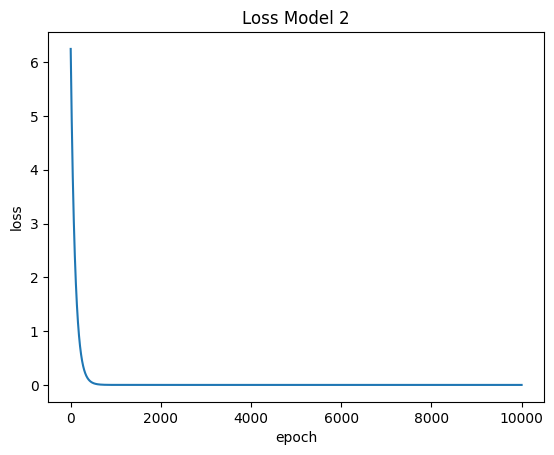

In [ ]:
plt.plot(range(0,n_epoch), loss_list2)
plt.title('Loss Model 2')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()